**Megan Rochella - 0706022210028**

**Adult Income Dataset**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [142]:
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/adult.csv')
df.head(10)

# Import dataset to pandas and show top 10 rows of the data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Exploratory Data Analysis

In [143]:
df.info()

# As we can see from the info, the total of the data are 48842, total of columns are 15, and no missing values
# Data types are int and object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [144]:
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is),
# and the minimum, maximum, and quartiles (25%, 50%, 75%).

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [145]:
print(df['income'].value_counts(dropna=False))
# Prints unique values count for categorical column (in this case target column "income")
# The dataset has more people with incomes below 50K (3x the ones above 50K)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [146]:
df['workclass'] = df['workclass'].replace('?', pd.NA)
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

df['occupation'] = df['occupation'].replace('?', pd.NA)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
# Fills the value '?' with mode

df.isnull().sum()
# Checks whether there is still a null value in each column which there are none (0)

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


<ipython-input-147-a3c21b1dfd3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='income', palette='Set2')


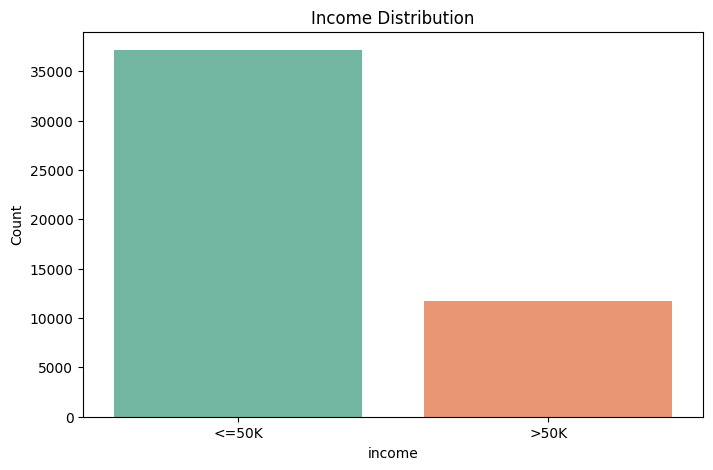

In [147]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='income', palette='Set2')
plt.title('Income Distribution')
plt.ylabel('Count')

plt.show()
# To visualize the count of individuals in each income category (<=50K and >50K)

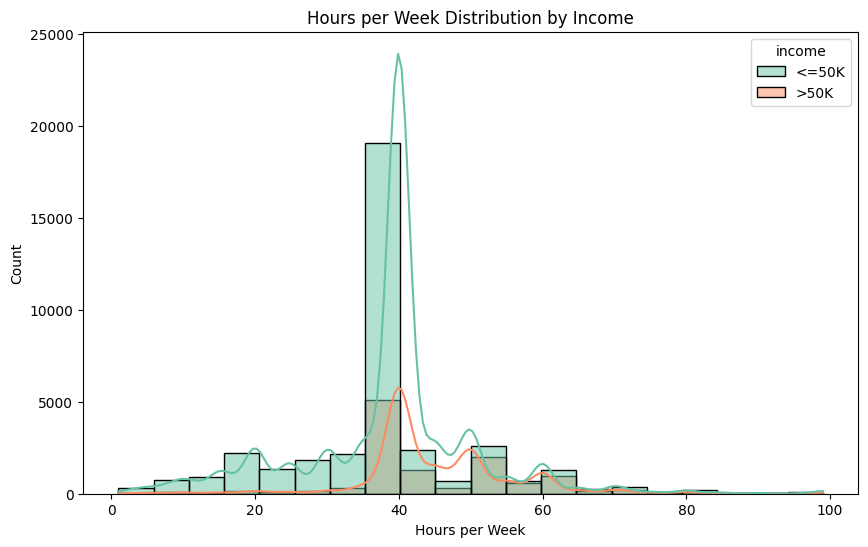

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours-per-week', hue='income', kde=True, bins=20, palette='Set2')
plt.title('Hours per Week Distribution by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Count')

plt.show()
# To compare the number of individuals in different work classes across income categories

<ipython-input-149-558f52079141>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y='age', palette='Set2')


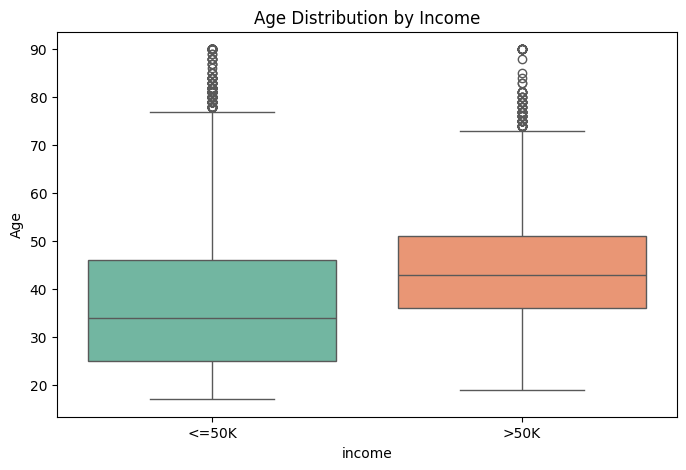

In [149]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='income', y='age', palette='Set2')
plt.title('Age Distribution by Income')
plt.ylabel('Age')

plt.show()
# To see how age varies between different income groups

In [150]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])
# Encode value from every coloumn from 'string' to 'numerous' with label encoder

df.sample(5)
# Shows random 5 rows of the data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
39192,30,4,84119,9,13,4,3,3,4,1,0,0,43,39,0
44974,32,3,137367,1,7,4,2,1,1,1,0,0,40,19,0
24194,29,1,187649,11,9,5,10,2,4,0,0,0,40,39,0
40645,32,3,195891,7,12,2,9,0,4,1,0,0,45,39,1
20606,25,3,308144,9,13,4,2,1,4,1,0,0,40,26,0


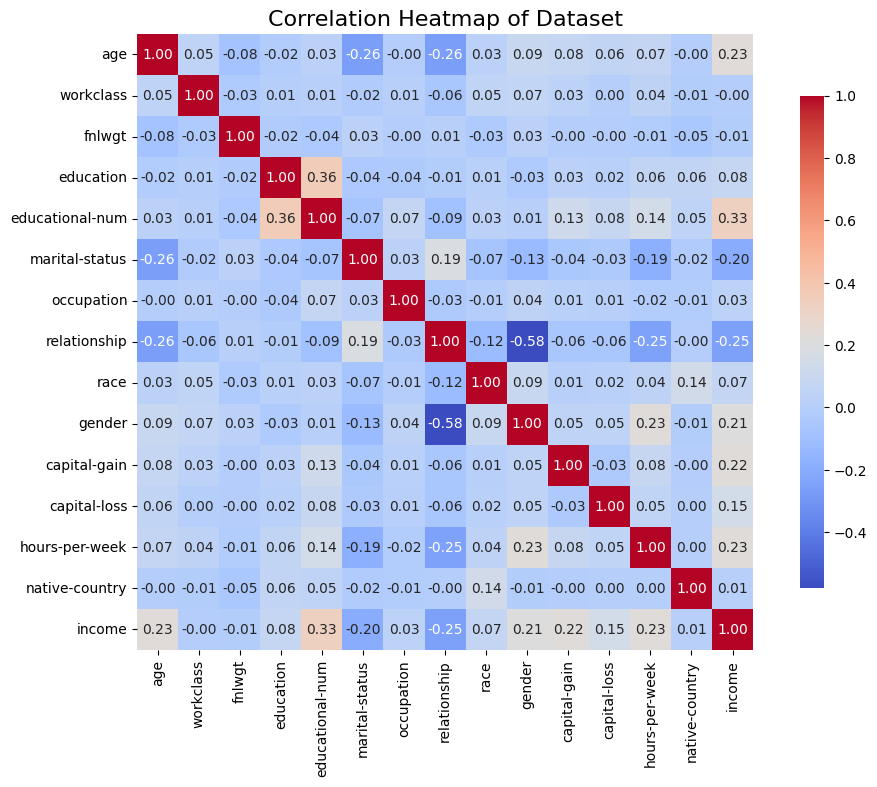

In [151]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Dataset', fontsize=16)

plt.show()
# The correlation matrix shows that the relationship between the features and the target variable "income" is not very strong.
# The strongest correlation is between "educational-num" and "income" with a correlation coefficient of 0.33.
# The other correlations are mostly weak or even negative.

In [152]:
X = df.drop(['income', 'fnlwgt', 'native-country'],axis=1) # This line creates a new DataFrame X by removing the column labeled 'income', 'fnlwgt', 'native-country' from the original DataFrame.
y = df['income'] # This column typically represents the target variable or label that the model will learn to predict based

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# It splits the feature set X and the target variable y into training and testing subsets.
# The 20% of the data will be used for testing, while 80% will be used for training.

X_train.shape, X_test.shape
# 'shape' method is used to check how many rows and columns are associated with each train or test data
# X_train has 39073 rows/data and 14 columns for training data
# X_test has 9769 rows/data and 14 columns for testing data

((39073, 12), (9769, 12))

## Decision Tree

## 1. Criterion Entropy

In [154]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [155]:
y_pred_en = clf_en.predict(X_test)
# Predicting the 'X_test' using Criterion Entropy

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 85% accuracy

Model accuracy score with criterion entropy: 0.8567


In [156]:
y_train_en = clf_en.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.8567
Training set score: 0.8508


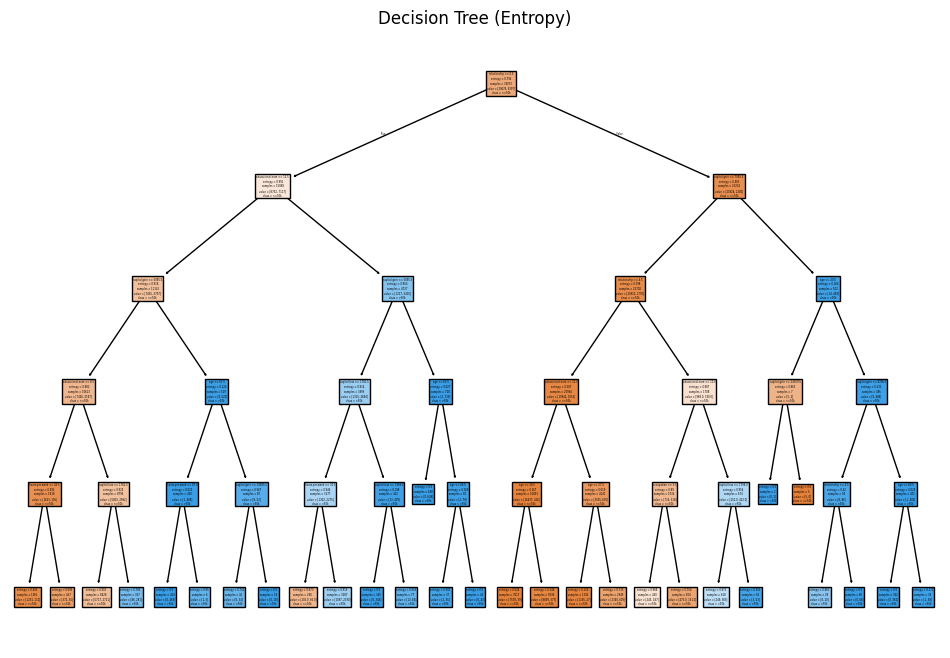

In [157]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en,
               feature_names=X.columns.tolist(),
               class_names=['<=50k', '>50k'],
               filled=True)
plt.title("Decision Tree (Entropy)")

plt.show()
# Creates the decision tree of the Criterion Entropy algorithm using matplotlib

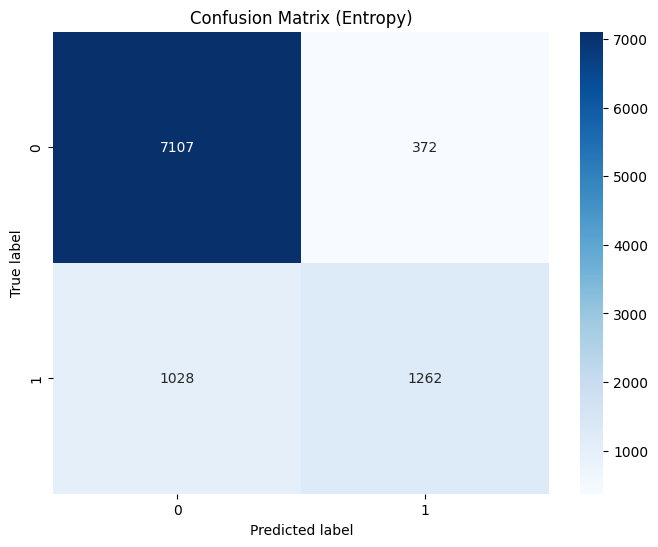

In [158]:
cm = confusion_matrix(y_test, y_pred_en)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Confusionn matrix of criterion entropy results in 8369 right predcitions out of 9769 datas

## 2. Gini Index

In [159]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini

DecisionTreeClassifier(max_depth=5, random_state=0)

In [160]:
y_pred_gini = clf_gini.predict(X_test)
# Predicts the 'X_test' using Criterion Gini

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 85% accuracy

Model accuracy score with criterion gini index: 0.8569


In [161]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.8569
Training set score: 0.8515


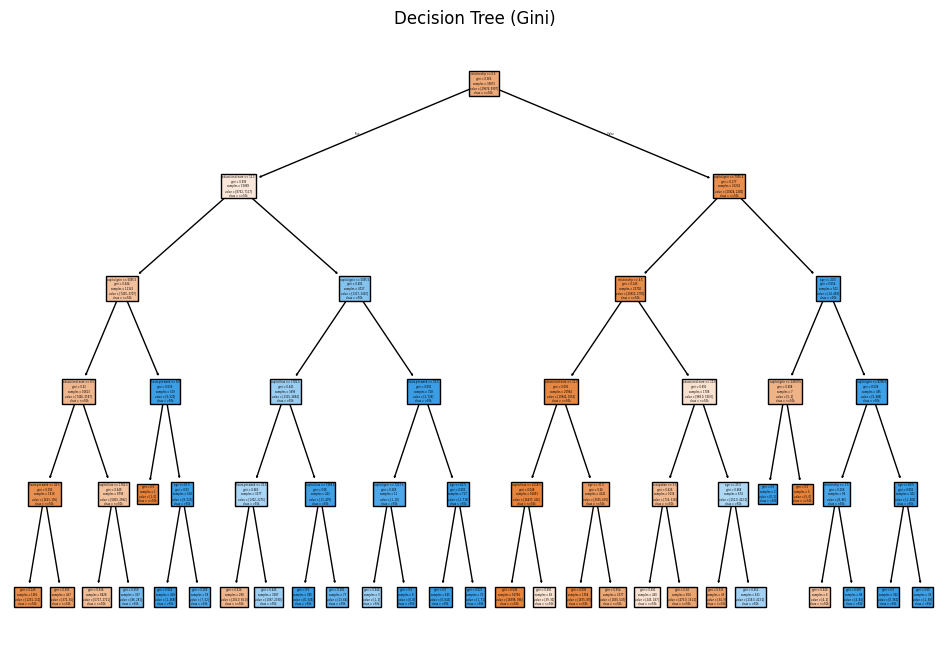

In [162]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini,
               feature_names=X.columns.tolist(),
               class_names=['<=50k', '>50k'],
               filled=True)
plt.title("Decision Tree (Gini)")

plt.show()
# Creates the decision tree of the Criterion gini algorithm using matplotlib

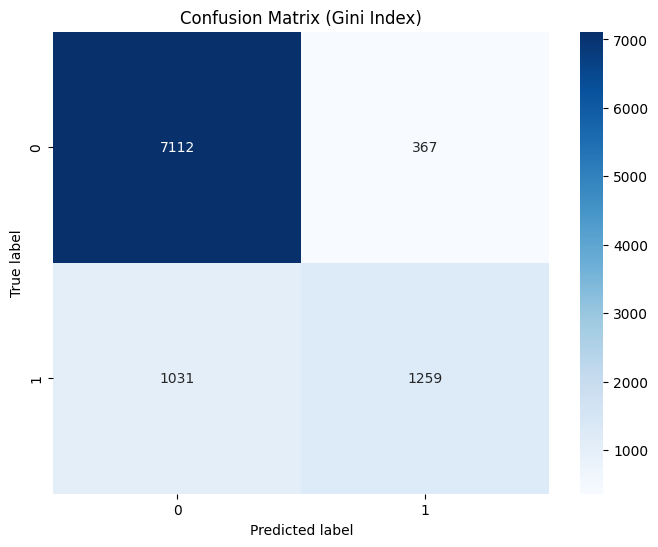

In [163]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini Index)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of gini index results in 8371 right predcitions out of 9769 datas

## 3. Naive Bayes

In [164]:
nb = GaussianNB()
nb.fit(X_train, y_train)
# Modelling using Naive Bayes Classifier

GaussianNB()

In [165]:
y_pred_nb = nb.predict(X_test)
# Predicts the 'X_test' using the Naive Bayes Classifier model

In [166]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Model accuracy score: {accuracy_nb:.4f}")
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with 80% accuracy

Model accuracy score: 0.8065


In [167]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.8065
Training set score: 0.8012


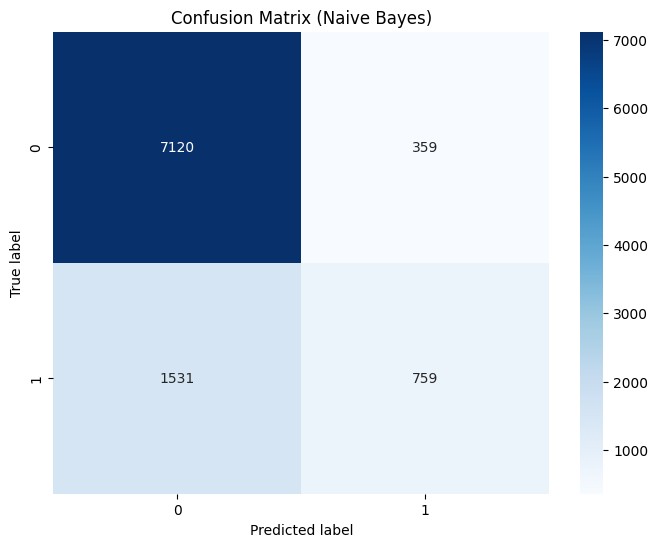

In [168]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of naive bayes results in 7879 right predcitions out of 9769 datas

## 4. KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier

k = 18
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Modelling using KNN
# Using k = 18 because it produces best overall performance
# And then predicts the 'X_test' using the KNN

In [170]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Model accuracy score: {accuracy_knn:.4f}")
# Prints accuracy score of KNN which is 85%

Model accuracy score: 0.8571


In [171]:
y_train_knn = knn.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_knn)
training_accuracy = accuracy_score(y_train, y_train_knn)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only 1%, so we conclude that the model is well-fitted

Testing set score: 0.8571
Training set score: 0.8637


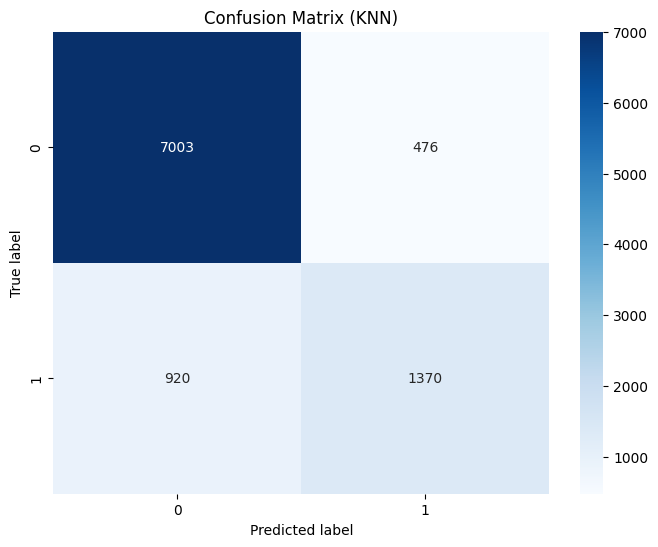

In [172]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()
# Confusionn matrix of KNN results in 8373 right predcitions out of 9769 datas

## Conclusion

In [173]:
mat_entropy = confusion_matrix(y_test, y_pred_en)
mat_gini = confusion_matrix(y_test, y_pred_gini)
mat_nb = confusion_matrix(y_test, y_pred_nb)
mat_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(mat_entropy)
# Shows confusion matrix of the Criterion Entropy

print("\nConfusion Matrix Gini:")
print(mat_gini)
# Shows confusion matrix of the Gini Index

print("\nConfusion Matrix Naive Bayes:")
print(mat_nb)
# Shows confusion matrix of the Naive Baiyes

print("\nConfusion Matrix KNN:")
print(mat_knn)
# Shows confusion matrix of the KNN

Confusion Matrix Entropy:
[[7107  372]
 [1028 1262]]

Confusion Matrix Gini:
[[7112  367]
 [1031 1259]]

Confusion Matrix Naive Bayes:
[[7120  359]
 [1531  759]]

Confusion Matrix KNN:
[[7003  476]
 [ 920 1370]]


In [174]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))
# Classification report of the Criterion Entropy
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))
# Classification report of the Gini Index
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))
# Classification report of the Naive Bayes
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))
# Classification report of the KNN
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769


Classification Report Gini
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7479
           1       0.77      0.55      0.64      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.75      0.78      9769
weighted avg       0.85      0.86      0.85      9769


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.68      0.33      0.45      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.64  

**Based on the classification reports provided for four different classifiers (Entropy, Gini, Naive Bayes, and KNN), we can draw several conclusions regarding their performance.**

* Accuracy: All classifiers achieved similar accuracy levels, around 0.86 for Entropy, Gini, and KNN, while Naive Bayes had a slightly lower accuracy of 0.81. This indicates that the first three classifiers performed comparably well in terms of overall correctness in predictions.

* Macro Average: The macro average scores indicate that the classifiers tend to perform better on class 0 than on class 1. The macro average f1-scores are around 0.78 for Entropy and Gini, and lower for Naive Bayes (0.66), which suggests that Naive Bayes has more difficulty with the minority class.

Class-Specific Performance
Class 0 (Negative Class):
* The precision and recall for class 0 are high across all classifiers, indicating that they effectively identify the majority class (class 0) with high accuracy.
* The f1-score for class 0 is also consistently high, suggesting a good balance between precision and recall.

Class 1 (Positive Class):
* The performance for class 1 is notably weaker across all classifiers compared to class 0.
* Precision and recall for class 1 are lower, particularly for Naive Bayes (precision: 0.68, recall: 0.33) and Gini (precision: 0.77, recall: 0.55). This indicates that while the classifiers can identify some positive instances, they struggle to do so effectively.
* The f1-score for class 1 is also significantly lower, particularly for Naive Bayes, highlighting a challenge in capturing this minority class.

Conclusion
* Entropy, Gini, and KNN are the best-performing classifiers in this scenario, with comparable results. They effectively identify the majority class while also providing reasonable performance on the minority class.
* There is a clear need for improvement in identifying class 1. Strategies such as resampling techniques (oversampling the minority class or undersampling the majority class) can be used to improve result.
* Based on the results, KNN or Gini might be preferred if a balance between precision and recall for both classes is desired, while Naive Bayes may require additional tuning or different approaches to enhance its performance on the minority class.